In [1]:
from IPython.display import HTML, Image, YouTubeVideo

# MSDS688 -- Artifical Intelligence

## Week 8 - Boosting

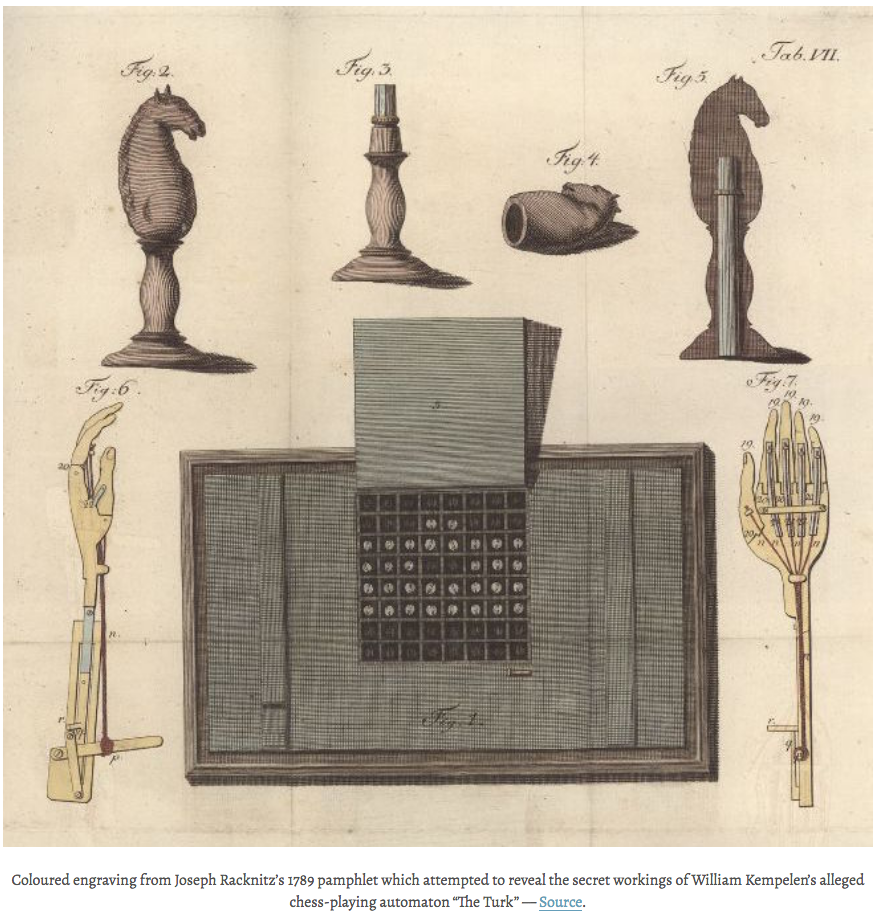

In [3]:
Image('images/kempelens-chess-playing-turk.png')

Kempelen was famous for the chess-playing Turk he had created. This life-sized model was exhibited all over Europe and America by Kempelen himself and then by others until its demise in a fire in 1854; in the course of its long career, reportedly beating both Napoleon and Charles Babbage. Although aspects of its movement — the motion of the arms, head, etc. — were mechanical, it was not, of course, a full automaton. The crucial chess-playing aspect was the work of a succession of skillful and diminutive human chess players concealed in its pedestal, something all but admitted by Kempelen, who said his main achievement had been to create an illusion. People no doubt knew it was a hoax, but they were fascinated anyway, because it dramatized the question of the age: whether a machine could reason, and relatedly, whether the human mind might itself be a kind of machine.

Edgar Allan Poe was taken by the question and in 1836 wrote an essay about Kempelen’s Turk and Babbage’s Difference Engine. He believed a machine could calculate, because calculation was a fixed and determinate process, but not that a machine could play chess because, he said, chess was indeterminate: the machine would have to respond to its opponent’s moves. So Babbage’s machine was genuine but Kempelen’s fraudulent.

Cite: Riskin, J. (n.d.). Frolicsome Engines: The Long Prehistory of Artificial Intelligence. Retrieved April 10, 2018, from [https://publicdomainreview.org/2016/05/04/frolicsome-engines-the-long-prehistory-of-artificial-intelligence/](https://publicdomainreview.org/2016/05/04/frolicsome-engines-the-long-prehistory-of-artificial-intelligence/)

# Review - Concepts and techniques

# Quiz / Exercise

# Lecture

_Note: Start with a promise_ 

## Learning Objectives

1. Select models that do not perform well, remove them from consideration and those that are left are good-enough or _probably approximately correct_.

1. Explain how neural network functions including the neurons, activation function, weights, forward propagation and back propagation.

1. Summarize the relationship between the number of features in a model and the density of data points. 

1. Illustrate how boosting improves the performance of decision trees through the use of weak learners and decision stumps.


# Neural Networks

* History of neural networks
* Multilayer perceptrons -- A basic neural net
* Hyperparameters and training
* Introduction to Keras
* Tune an example network

![Origin of idea for neural networks was to model the brain](images/nn-biomimicry.png)

Frank Burkholder, Neural Networks: Multi-layer perceptron, Galvanize Data Science, 2017. 

![Later key developments help create the multilayer perceptron model](images/nn-extending-the-idea.png)

Frank Burkholder, Neural Networks: Multi-layer perceptron, Galvanize Data Science, 2017. 

![comparison of a neuron and perceptron mathematical model](images/nn-perceptron-model.png)

Frank Burkholder, Neural Networks: Multi-layer perceptron, Galvanize Data Science, 2017.

![neural networks progress halted in late 1960s by inability to model an XOR gate](images/nn-xor-set-back.png)

**Conslusion: Single layer neural networks can only function as linear classifiers**

## 1985: XOR problems solved

**Researchers at the University Toronto solve the XOR problem using a multilayer perceptron.**  Geoffery Hinton co-authored this paper and is one of the world's leading experts on neural networks.  All his papers, talks and research findings can be found on his [home page](http://www.cs.toronto.edu/~hinton/).  Don't miss his talk a Google titled [Brains, Sex and Machine Learning](https://youtu.be/DleXA5ADG78).

![break through in neural net architecture in 1985](images/nn-multilayer-breakthrough.png)

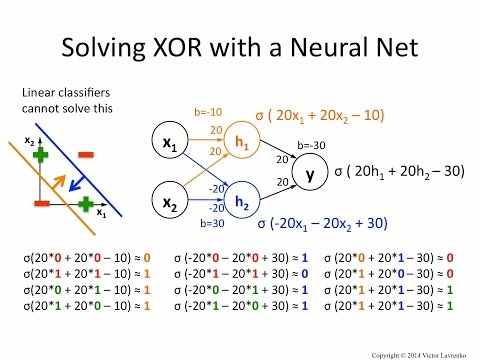

In [2]:
## A Multilayer Neural Network Solves the XOR problem 

from IPython.display import YouTubeVideo
YouTubeVideo('kNPGXgzxoHw', width=1024, height=576)

![human brain as a computer](images/nn-motivation.png)

Frank Burkholder, Neural Networks: Multi-layer perceptron, Galvanize Data Science, 2017.  

# Break 

![]()

In [ ]:
## Boosting

# Demonstration

# Exercise

_Note: End with humor_